In [1]:
import utils_sleepasandroid as us
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# Read in the Sleep as Android data and print some of the headers
SA_data = 'sample_data/SleepAsAndroid_data.csv'
sa_file_as_list = us.read_sleepasandroid_file(SA_data)
sa_file_as_list[0][0:15]

['Id',
 'Tz',
 'From',
 'To',
 'Sched',
 'Hours',
 'Rating',
 'Comment',
 'Framerate',
 'Snore',
 'Noise',
 'Cycles',
 'DeepSleep',
 'LenAdjust',
 'Geo']

In [4]:
# Parse the first record
ridx  = 0
split_record = us.split_sleepasandroid_record(sa_file_as_list, ridx)

# Print the awake records to get an idea of the data
split_record.awake

array([['AWAKE_START', '1521283215630'],
       ['AWAKE_END', '1521283515630'],
       ['AWAKE_START', '1521287920946'],
       ['AWAKE_END', '1521288520946']], dtype='<U13')

In [5]:
split_record.light_sleep[0:6]

array([['LIGHT_START', '1521266889893'],
       ['LIGHT_END', '1521267189893'],
       ['LIGHT_START', '1521268689893'],
       ['LIGHT_END', '1521269589893'],
       ['LIGHT_START', '1521270489893'],
       ['LIGHT_END', '1521271389893']], dtype='<U13')

In [6]:
split_record.deep_sleep[0:6]

array([['DEEP_START', '1521267189893'],
       ['DEEP_END', '1521268689893'],
       ['DEEP_START', '1521269589893'],
       ['DEEP_END', '1521270489893'],
       ['DEEP_START', '1521271389893'],
       ['DEEP_END', '1521273789893']], dtype='<U13')

In [26]:
split_record.hr[:].T[2]

array(['73.48148', '66.39773', '62.09375', '64.16071', '66.6625',
       '72.675', '67.03125', '72.00781', '79.13393', '86.291664',
       '77.39946', '69.81641', '88.6375', '71.11667', '74.87891',
       '75.89453', '74.953125', '77.52187', '81.85', '75.009865',
       '79.10714', '85.35304', '78.41912', '88.5', '85.52419',
       '79.177086', '79.15131', '84.958336', '87.12216', '71.53571',
       '75.25', '77.79107', '81.14732', '76.1546', '76.1875', '76.26488',
       '74.13015', '71.08263', '71.5625', '78.43304', '70.25329',
       '70.427086', '72.64946', '75.625', '83.270836', '76.89332',
       '80.75694', '78.604164', '72.47321', '71.61556', '69.992645',
       '68.822914', '69.93588', '70.270836', '101.60714', '99.9375',
       '71.69688', '87.078125', '75.395836', '81.2474', '74.9',
       '96.604164', '73.46875', '80.30312', '68.05882', '61.40625',
       '67.18437', '63.34375', '65.203125', '66.5', '68.986145',
       '67.879166', '66.74009', '72.20536', '73.824776', '65.6

In [9]:
sleep_record, ls_record, ds_record, awake_record = us.parse_sleep_records(split_record)

In [10]:
sleep_record.stage

array(['LightSleep', 'DeepSleep', 'LightSleep', 'DeepSleep', 'LightSleep',
       'DeepSleep', 'LightSleep', 'DeepSleep', 'LightSleep', 'DeepSleep',
       'LightSleep', 'DeepSleep', 'LightSleep', 'DeepSleep', 'LightSleep',
       'Awake', 'DeepSleep', 'LightSleep', 'DeepSleep', 'LightSleep',
       'DeepSleep', 'LightSleep', 'Awake', 'DeepSleep', 'LightSleep'],
      dtype=object)

In [18]:
ls_record.cycle_start_ms

array([       0,  1800000,  3600000,  6900000, 11400000, 12300000,
       14400000, 15900000, 18600000, 19500000, 21000000, 23700000])

In [19]:
ls_record.cycle_end_ms

array([  300000,  2700000,  4500000, 10500000, 11700000, 13800000,
       15300000, 16500000, 18900000, 20400000, 21900000, 26878512])

In [17]:
awake_record

Awake_Record(cycle_start_ms=array([16325737, 21031053]), cycle_end_ms=array([16625737, 21631053]), cycle_duration_ms=array([300000, 600000]), ncycles=2)

In [12]:
sleep_record._fields

('ncycles', 'start_ms', 'end_ms', 'duration_ms', 'stage', 'stage_code')

In [15]:
sleep_record.start_ms

array([       0,   300000,  1800000,  2700000,  3600000,  4500000,
        6900000, 10500000, 11400000, 11700000, 12300000, 13800000,
       14400000, 15300000, 15900000, 16325737, 16500000, 18600000,
       18900000, 19500000, 20400000, 21000000, 21031053, 21900000,
       23700000])

In [16]:
sleep_record.end_ms

array([  300000,  1800000,  2700000,  3600000,  4500000,  6900000,
       10500000, 11400000, 11700000, 12300000, 13800000, 14400000,
       15300000, 15900000, 16500000, 16625737, 18600000, 18900000,
       19500000, 20400000, 21000000, 21900000, 21631053, 23700000,
       26878512])

In [28]:
heartRateData = np.array(split_record.hr[:].T[2], dtype=float)
rHR_p5 = np.percentile(heartRateData, 5)
rHR = heartRateData.min()
print(rHR, rHR_p5)

61.40625 65.04676275


Text(30000,2.25,'Resting Heart Rate = 65')

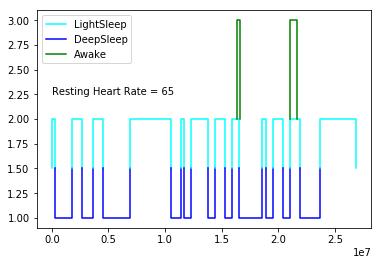

In [29]:
fig, ax = plt.subplots()
for idx in range(sleep_record.ncycles):
    start = sleep_record.start_ms[idx]
    end = sleep_record.end_ms[idx]
    x = [start, start, end, end]
    scode = sleep_record.stage_code[idx]
    
    if sleep_record.stage[idx] == 'LightSleep':
        y = [1.5, scode, scode, 1.5]
        c = 'cyan'
    elif sleep_record.stage[idx] == 'DeepSleep':
        y = [1.5, scode, scode, 1.5]
        c = 'blue'
    elif sleep_record.stage[idx] == 'Awake':
        y = [2, scode, scode, 2]
        c = 'green'
    ax.plot(x, y, color=c)
ax.plot([],[], c='cyan', label='LightSleep')
ax.plot([],[], c='blue', label='DeepSleep')
ax.plot([],[], c='green', label='Awake')
ax.legend(loc=2)
ax.text(30000, 2.25, 'Resting Heart Rate = {0}'.format(int(rHR_p5)))